In [1]:
import numpy as np
import pylab as pl
from scipy.fft import fft2, fftshift, ifft2, fft, ifft
from tqdm import tqdm

%matplotlib inline

In [2]:
def E_inc(x,y, L=1):
    XX, YY = np.meshgrid(x,y)
    f = -(np.sin(2*np.pi*XX/L))
    return 1*((f>0))

In [3]:
xmin, xmax = 0, 30
dx = (xmax-xmin)/512
x = np.arange(xmin, xmax+dx, dx)
y = np.array([0])
Ef0 = E_inc(x,y, L=2)*(x>5)*(x<25)

/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)
/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


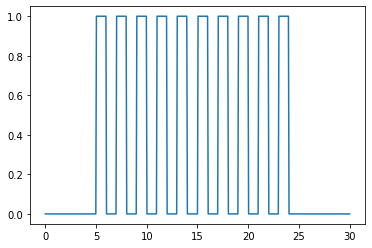

In [4]:
#pl.contourf(x,y, Ef0, levels=10, cmap='hot')
pl.plot(x, Ef0[0])

# Talbot effect

100%|██████████| 50/50 [02:44<00:00,  3.29s/it]


/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)
/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


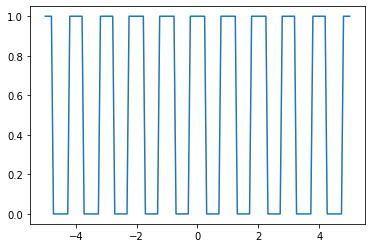

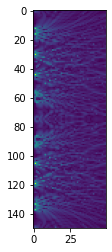

In [18]:
from OpticsUtils import Romberg


def SingleSlit(x, x0=0, w = 1):
    return 1*(np.abs(x-x0)<=w/2)


def E(x,z, a,b, lam):
    if z==0:
        ans = 0
        for x0 in range(-6, 6, 1):
            ans = ans + SingleSlit(x, x0=x0, w = 0.5)
        return ans
    else:
        def f(xp):
            t1 = 1/(1j*lam)
            t2 = E(xp,0, a, b, lam)
            k = 2*np.pi/lam
            r = np.sqrt((xp-x)**2+z**2)
            t3 = np.exp(1j*k*r)/r
            t4 = z/r
            integrand = t2*t3*t4
            return t1*integrand
        
        i1 = Romberg(f, a,b, tol=1e-2)
        return i1.value

lam = 0.1
a,b = -5,5
xrange = np.linspace(a,b,150)
zrange = np.linspace(0, 2.5, 50)

pl.figure()
pl.plot(xrange,E(xrange,0,a,b, lam))


E_final = {}
z = np.zeros([len(xrange), len(zrange)], dtype='complex128')
for zj in tqdm(zrange):
    for xi in xrange:
        E_final[(xi,zj)] = E(xi, zj, a,b, lam)
        z[list(xrange).index(xi)][list(zrange).index(zj)] = E_final[(xi,zj)]
        #print(("(%5.3f, %5.3f)")%(xi, zj), end=', ')
pl.figure()
pl.imshow(np.abs(z))

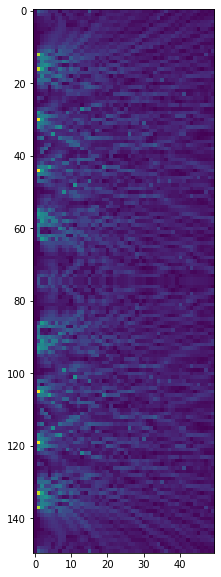

In [19]:
pl.figure(figsize=(10,10))
pl.imshow(np.abs(z))

In [ ]:
from OpticsUtils import Romberg
def f(x):
    return 4/(1+x**2)

a,b = 0,1
i1 = Romberg(f, a,b)

In [ ]:
i1.value

In [3]:
from tqdm import tqdm
from time import sleep
import numpy as np

In [5]:
imax, jmax = 1000,1000
for i in tqdm(np.arange(imax)):
    sleep(0.1)

 54%|█████▍    | 539/1000 [00:54<00:46,  9.86it/s]


KeyboardInterrupt: 